# **Problem Statement**

Dengue fever is a major health concern in Bangladesh, where fluctuating climatic conditions such as temperature, humidity, and rainfall significantly influence outbreak patterns.
Accurate early prediction of dengue outbreaks can support timely medical response and resource allocation.

This project aims to develop a Naive Bayes classification model that predicts the likelihood of a dengue outbreak based on climate indicators.
Using the DengueAndClimateBangladesh.csv dataset, the model learns how environmental factors correlate with outbreak occurrences, providing a probabilistic framework for early disease detection and public health planning.

Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Load database

In [2]:
df = pd.read_csv("/content/DengueAndClimateBangladesh.csv")

EDA

In [3]:
df.head()

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
0,2008,1,12.993929,25.059539,78.824885,1.286636,0
1,2008,2,13.658286,26.383448,72.602956,0.687685,0
2,2008,3,20.411250,31.367558,76.903226,0.974194,0
3,2008,4,22.771889,34.031619,73.943810,0.980952,0
4,2008,5,23.945625,34.171060,77.360369,7.021198,0


In [4]:
df.shape

(134, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      134 non-null    int64  
 1   MONTH     134 non-null    int64  
 2   MIN       134 non-null    float64
 3   MAX       134 non-null    float64
 4   HUMIDITY  134 non-null    float64
 5   RAINFALL  134 non-null    float64
 6   DENGUE    134 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 7.5 KB


In [6]:
df.describe()

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,2013.089552,6.425373,20.943415,30.848480,80.115577,27.840582,211.582090
std,3.233896,3.493015,4.830249,2.851090,5.253859,98.393795,451.214606
min,2008.000000,1.000000,10.597946,23.522676,67.548387,0.000000,0.000000
25%,2010.000000,3.000000,16.404490,29.277935,77.188214,0.547765,0.000000
50%,2013.000000,6.000000,22.935495,31.987028,80.093810,6.008095,36.000000
75%,2016.000000,9.000000,25.278970,32.676912,84.778111,12.774048,187.000000
max,2019.000000,12.000000,26.485821,35.769333,88.384071,689.161290,3087.000000


In [7]:
dups = df.duplicated()
print("Number of duplicates:", dups.sum())

Number of duplicates: 0


In [8]:
print(df.isnull().sum())

YEAR        0
MONTH       0
MIN         0
MAX         0
HUMIDITY    0
RAINFALL    0
DENGUE      0
dtype: int64


Checking for outliers using box plot

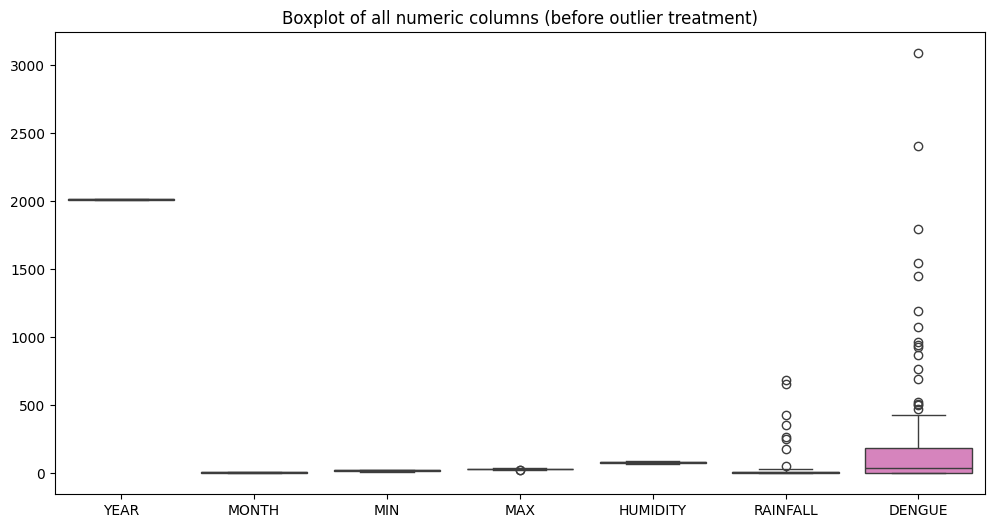

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot of all numeric columns (before outlier treatment)")
plt.show()

Treating outliers

In [10]:
def remove_outlier(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [11]:
for column in df.columns:
    lr, ur = remove_outlier(df[column])
    df[column] = np.where(df[column] > ur, ur, df[column])
    df[column] = np.where(df[column] < lr, lr, df[column])

Box plot after treating outliers

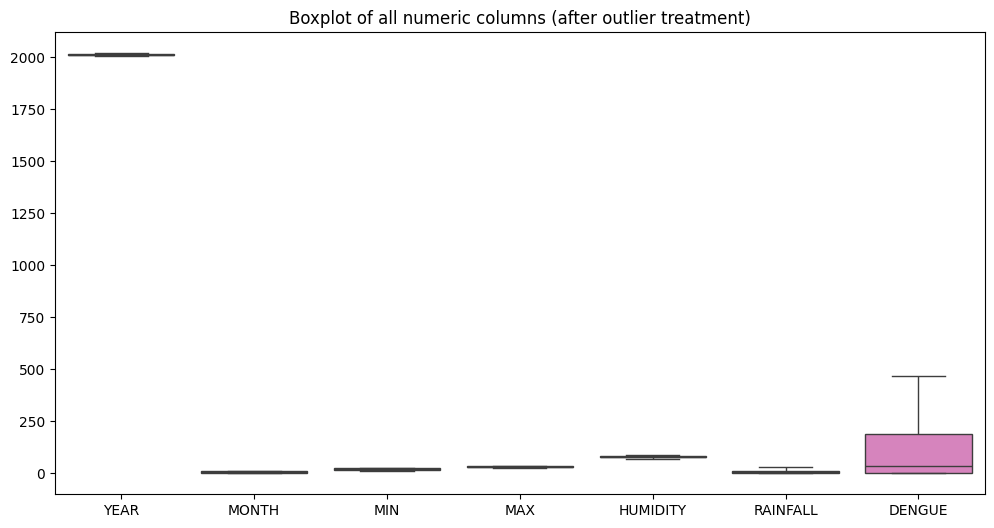

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot of all numeric columns (after outlier treatment)")
plt.show()

Displot visualization of data

<Figure size 800x400 with 0 Axes>

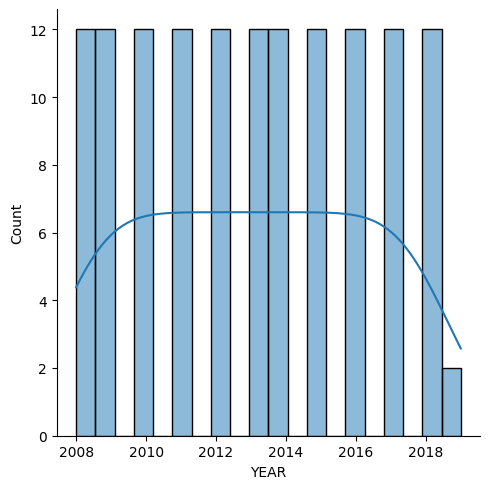

<Figure size 800x400 with 0 Axes>

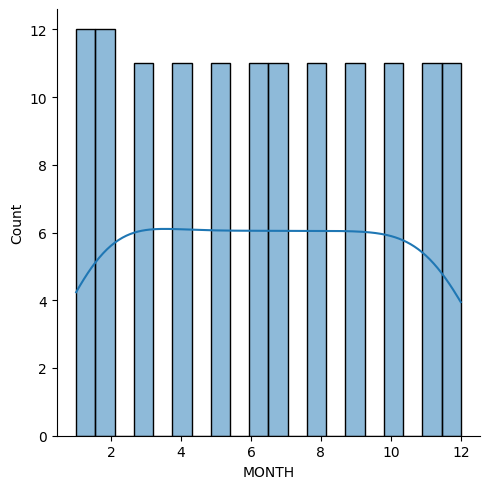

<Figure size 800x400 with 0 Axes>

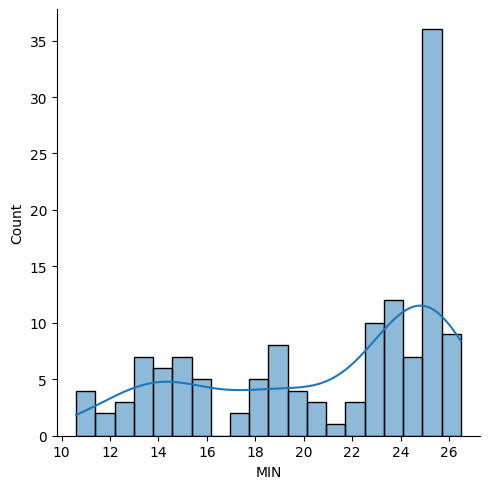

<Figure size 800x400 with 0 Axes>

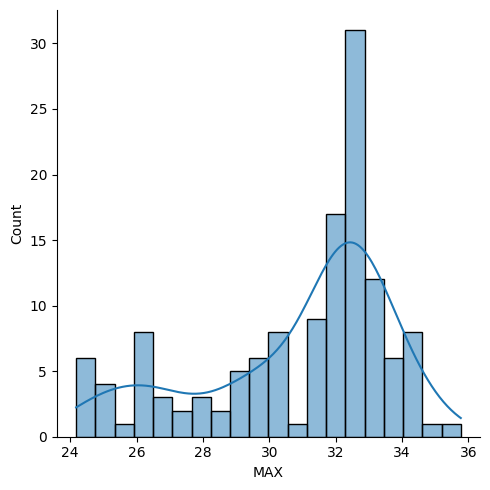

<Figure size 800x400 with 0 Axes>

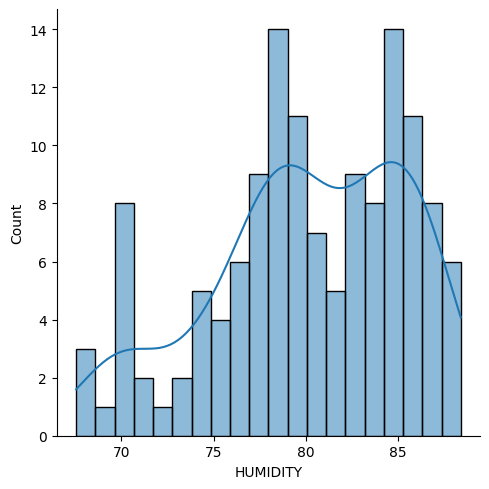

<Figure size 800x400 with 0 Axes>

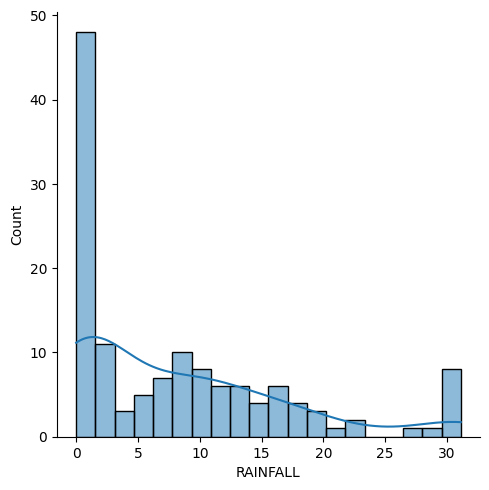

<Figure size 800x400 with 0 Axes>

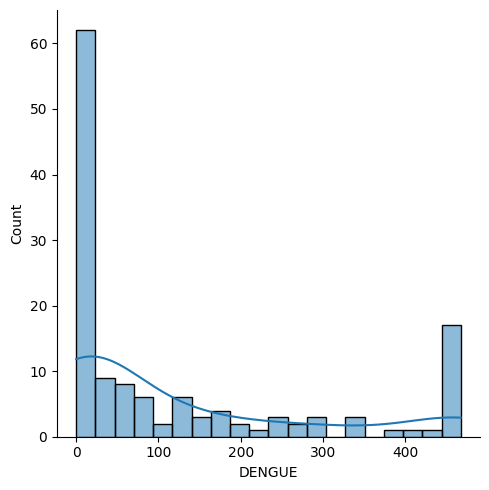

In [14]:
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.displot(df[column], bins=20, kde=True)

Pair plot

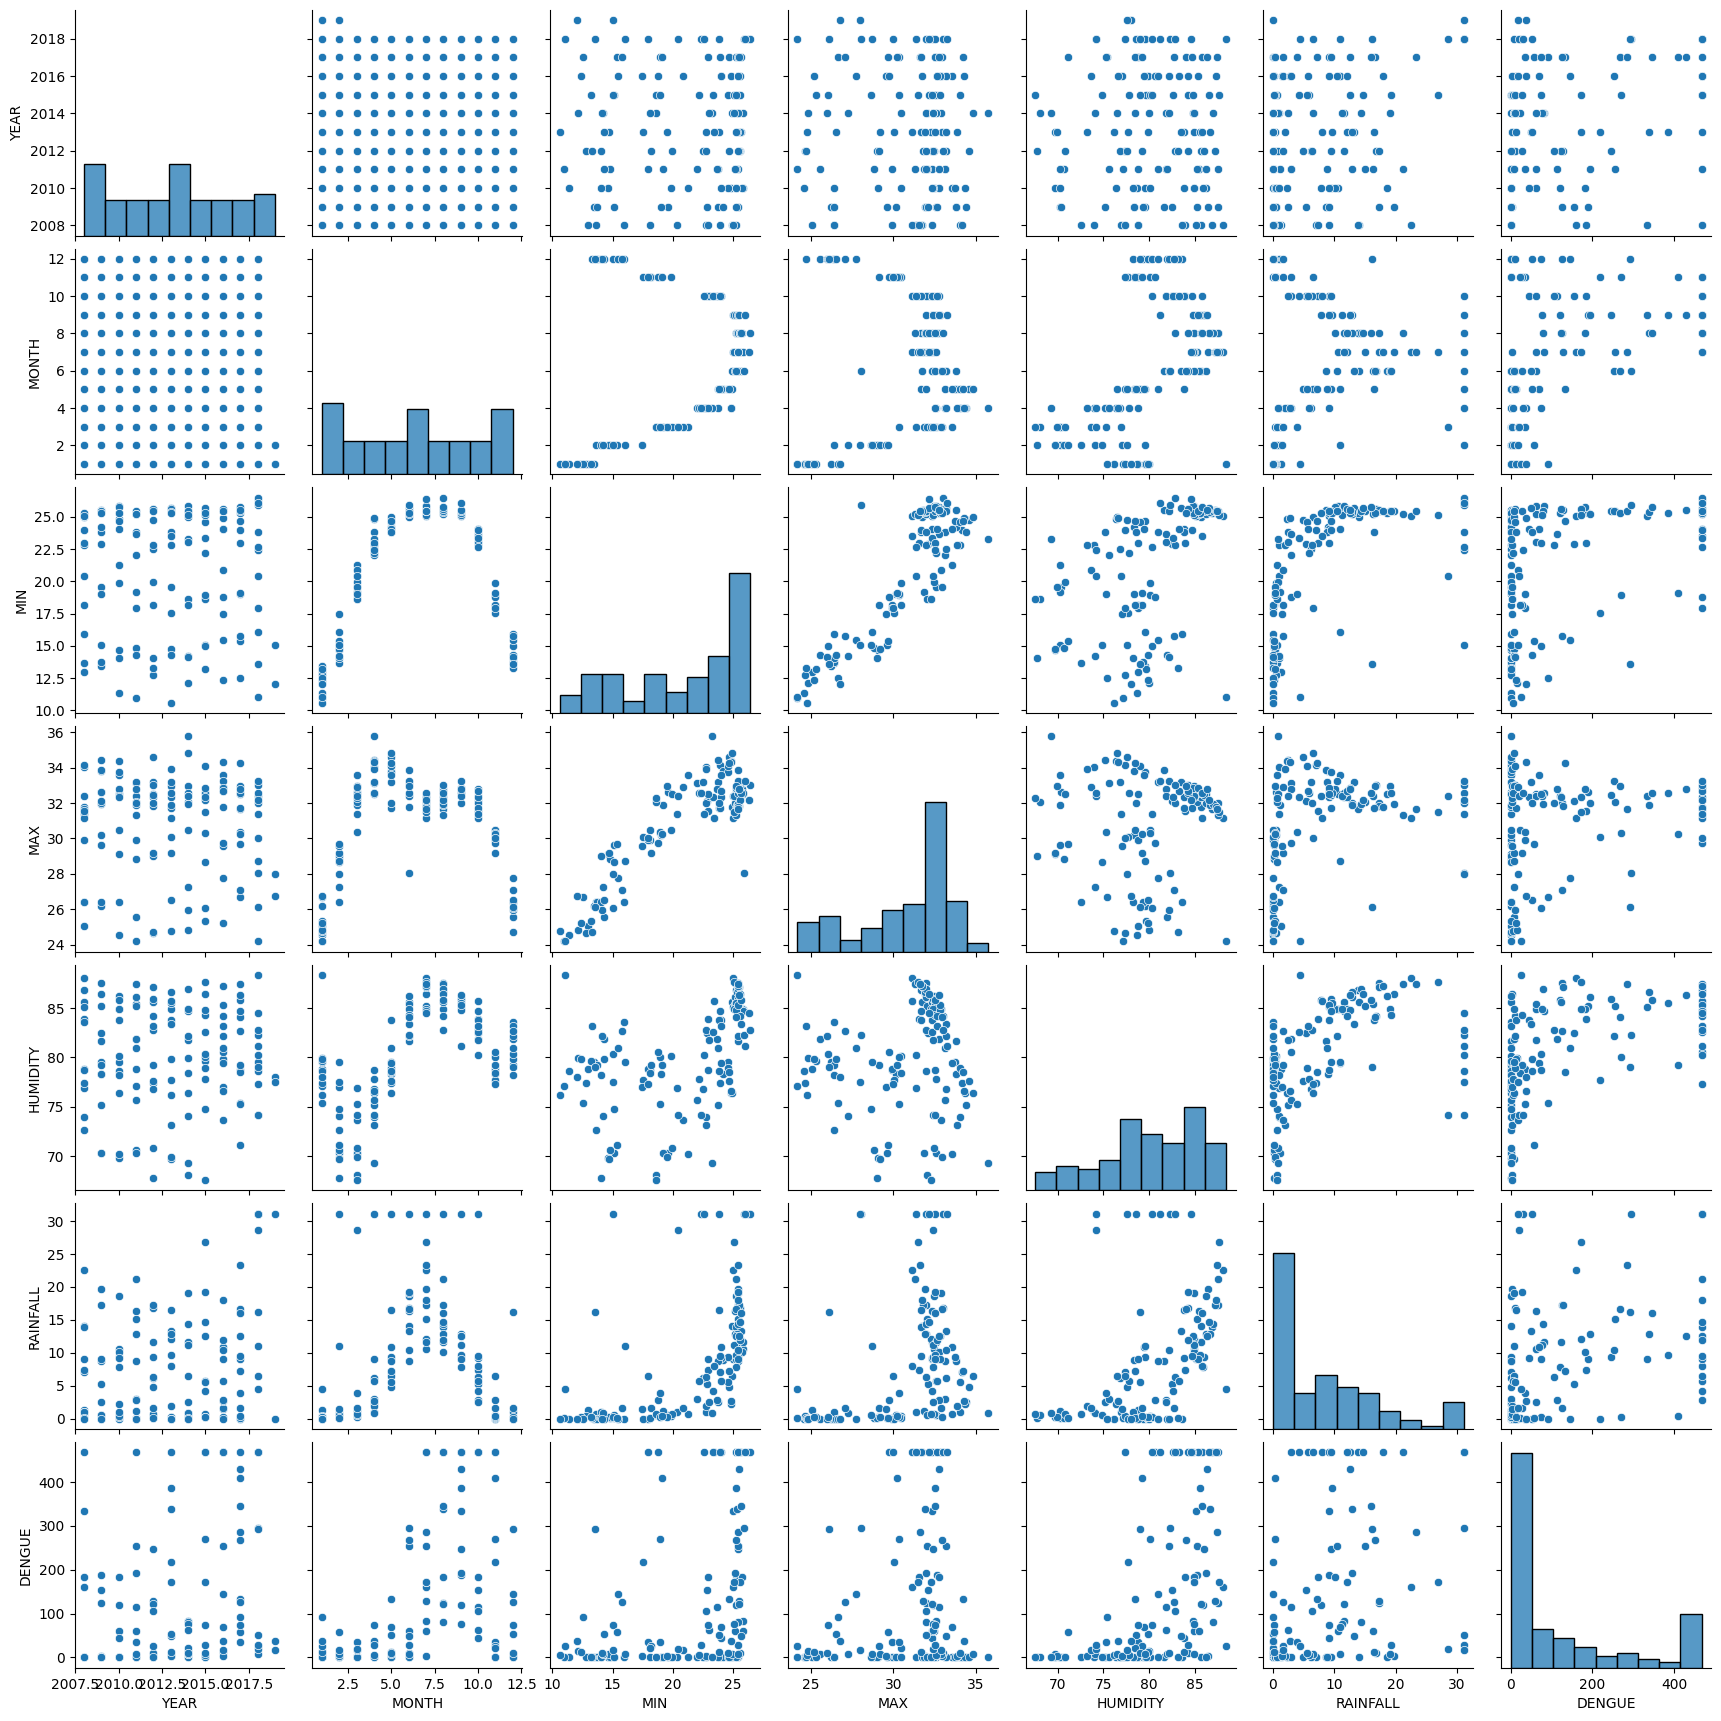

In [15]:
sns.pairplot(df)
plt.show()

Heat Map

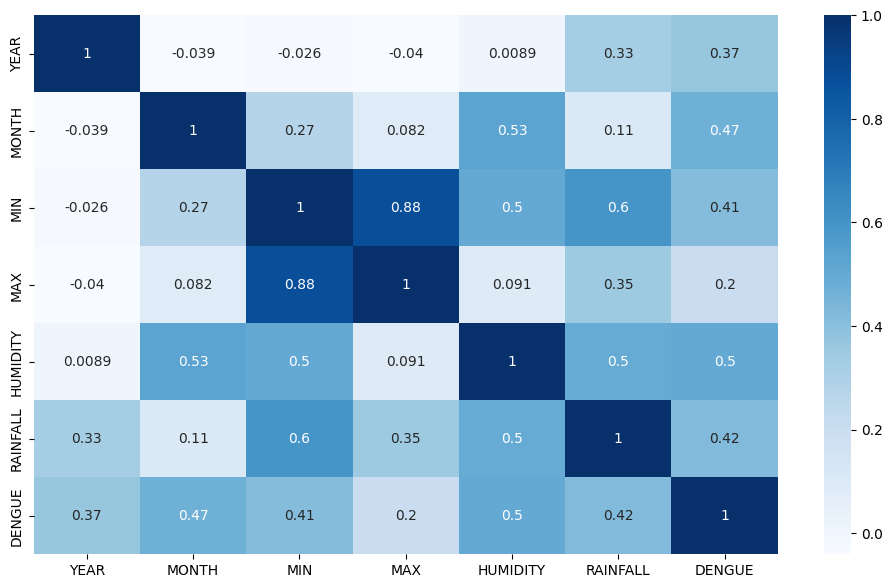

In [16]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

In [24]:
df['DENGUE_CLASS'] = df['DENGUE'].apply(lambda x: 1 if x > 0 else 0)

In [25]:
X = df.drop("DENGUE_CLASS",axis=1)
y = df["DENGUE_CLASS"]

train test split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Naive Bayes Classifier Application

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

Training Accuracy

In [28]:
y_pred_train = NB_model.predict(X_train)
print("Training Accuracy:",metrics.accuracy_score(y_train,y_pred_train))

Training Accuracy: 1.0


Testing Accuracy

In [29]:
y_pred_test = NB_model.predict(X_test)
print("Testing Accuracy:",metrics.accuracy_score(y_test,y_pred_test))

Testing Accuracy: 1.0


Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_test))

Confusion Matrix:
 [[13  0]
 [ 6 22]]


Classification Report

In [36]:
print("\nClassification Report:\n",classification_report(y_test,y_pred_test))


Classification Report:
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        13
           1       1.00      0.79      0.88        28

    accuracy                           0.85        41
   macro avg       0.84      0.89      0.85        41
weighted avg       0.90      0.85      0.86        41



KNN classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

training accuracy

In [32]:
y_pred_train = knn_model.predict(X_train)
print("Training Accuracy:",metrics.accuracy_score(y_train,y_pred_train))

Training Accuracy: 0.9139784946236559


testing accuracy

In [33]:
y_pred_test = knn_model.predict(X_test)
print("Testing Accuracy:",metrics.accuracy_score(y_test,y_pred_test))

Testing Accuracy: 0.8536585365853658


confusion matrix

In [37]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_test))

Confusion Matrix:
 [[13  0]
 [ 6 22]]


classification_report

In [38]:
print("\nClassification Report:\n",classification_report(y_test,y_pred_test))


Classification Report:
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        13
           1       1.00      0.79      0.88        28

    accuracy                           0.85        41
   macro avg       0.84      0.89      0.85        41
weighted avg       0.90      0.85      0.86        41



# **Conclusion**

The Naive Bayes classifier performed well in predicting dengue outbreak likelihood from climatic features.
With an accuracy of 85%, the model effectively differentiated between non-outbreak (0) and outbreak (1) classes.

Key evaluation metrics:

Precision: 0.90 (weighted average)

Recall: 0.85 (weighted average)

F1-score: 0.86 (weighted average)

These results indicate a balanced model with high reliability in outbreak detection.
Notably:

The model perfectly identified all non-outbreak cases (Recall = 1.00 for class 0).

It achieved strong performance for outbreak detection (Precision = 1.00 for class 1).

Overall, Naive Bayes proved to be a robust and interpretable model, providing meaningful insight into the relationship between climate and dengue incidence — a valuable tool for data-driven health surveillance.